<center>

# Trabajo Práctico Final

## Procesamiento de señales biomédicas

### Primer Cuatrimestre 2024

</center>

**Docentes:**

- Roberto Sebastián Tomás
- Aylin Agatha Vazquez Chenlo
- Francisco Tassara
- Victoria Reppucci

**Alumnxs:**

- Bajlec, Ivo - 62175
- Grau, Gonzalo - 62259
- Pereira, Camila Noemi - 61574

### Objetivo del trabajo

El objetivo del presente trabajo es desarrollar un algoritmo, implementado los conocimientos obtenidos en las clases teóricas, que nos permita obtener una medida objetiva y estandarizada sobre la percepción sonora. Para realizar esto, el algoritmo que se desarrolló, se busco que sea capaz de procesar las información de los potenciales evocados auditivos, por medio de los cuatro tipos de promedios: homogéneo, inhomogéneo con amplitud variable, inhomogéneo con varianza variable e inhomogéneo con amplitud y varianza variable, y con la implementación de diferentes métodos como welch, interpretar esa información obtenida como un nivel de percepción sonora.

### Estado del arte 

Los potenciales evocados (PE) son pruebas diagnósticas que evalúan la integridad de las vías sensitivas a través de la estimulación sensorial, en este caso auditiva, y el registro de las respuestas cerebrales. Dichas respuestas, se registran mediante estímulos repetitivos y se promedian para mejorar la relación señal-ruido, permitiendo una evaluación más precisa de las vías neuronales estimuladas. Link = https://www.cun.es/enfermedades-tratamientos/pruebas-diagnosticas/potenciales-evocados

**Tipos de potenciales evocados:**
1) Emisiones otoacústicas (OAE): este tipo de sonidos son emitidos por el oído interno, precisamente por las células ciliadas externas de la cóclea, como respuesta a un estímulo auditivo. Estas emisiones se utilizan para evaluar la función coclear, además de resultar útiles para la detección temprana de la pérdida auditiva. Métodos como las emisiones otoacústicas transitorias, que se basan en OAE, son utilizadas para estimar el crecimiento de la sonoridad.

2) Respuestas auditivas evocadas del tronco del encéfalo (ABR): este tipo de potenciales son generados por la actividad neural en el tronco del encéfalo en respuesta a estímulos auditivos. Los ABR reflejan la actividad neural desde el nervio auditivo hasta el tronco del encéfalo. Las grabaciones de ABR, se utilizan para evaluar la audición y la integridad de las vías auditivas centrales, siendo útiles para estimar el umbral auditivo y detectar problemas neurológicos que puedan afectar las vías auditivas. Otro método también utilizado es el de las ABR con explosiones de tonos (TBABR), que sirve para estimar el crecimiento de la sonoridad en relación con la intensidad del estímulo.

Para el siguiente trabajo, nos enfocaremos en el análisis de PE del tipo ABR, específicamente TBABR.

**Potencial evocado auditivo**

<center>

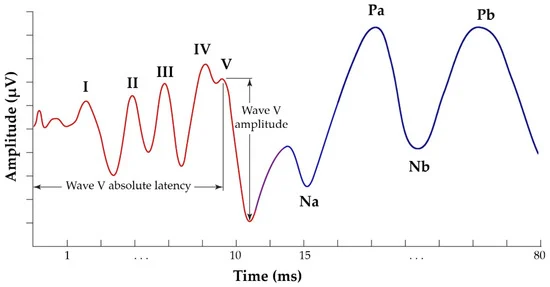

</center>

COMPLETAR Y PONER UNA IMAGEN TEORICA. ENFASIS EN LA ONDA 5.

**Modelado de los potenciales evocados**

La medición de una señal de potencial evocado es inherentemente ruidosa. Sin embargo, se puede eliminar gran parte de este ruido mediante la adecuada combinación de múltiples mediciones. Sea sea $s(t)$ la señal del PE que se desea medir, la cual asumimos idéntica en su morfología para todas las mediciones a igual estímulo, y sea la $x_{i}(t)$ la i-ésima medición (trial) obtenida. Luego, para mayor generalización, supongamos también que la amplitud con la que se presenta la señal $s(t)$ también puede variar entre trials, y llamemos $a_{i}$ a la amplitud del PE en $x_{i}$. Finalmente, sea $eta_{i}(t)$ el ruido presente en el i-ésimo trial. Se modela entonces a las lecturas de un experimento de medición de PE como:

\begin{equation}
x_{i}(t) = a_{i}s(t) + \eta_{i}(t)
\end{equation}

Sea $N$ el número total de trials que se midieron en el experimento. En términos vectoriales, sean $\mathbf{x}, \mathbf{s}, \mathbf{a}, \mathbf{\eta} \in \mathbb{R}^{NX1}$ tal que $\mathbf{x} = \begin{bmatrix} x_1 & x_2 & \dots x_N \end{bmatrix}^{T}$, $\mathbf{s} = \begin{bmatrix} s & s & \dots s \end{bmatrix}^{T}$, $\mathbf{a} = \begin{bmatrix} a_1 & a_2 & \dots a_N \end{bmatrix}^{T}$, y $\mathbf{\eta} = \begin{bmatrix} \eta_1 & \eta_2 & \dots \eta_N \end{bmatrix}^{T}$. A su vez, sea $\sigma_i$ la desviación estándar del ruido $\eta_i$, y sea $\mathbf{\sigma} = \begin{bmatrix} \sigma_1 & \sigma_2 & \dots \sigma_N \end{bmatrix}^T$. De esta manera, la ecuación anterior se puede representar como

\begin{equation}
\mathbf{x} = \mathbf{a}^T \mathbf{s} + \mathbf{\eta}
\end{equation}


**Reducción de ruido en mediciones de PE**
Una forma de extraer la señal $s(t)$ a partir de los trials $x_{i}(t)$ aumentando la relación señal/ruido (SNR) consiste en promediar las lecturas en forma ponderada. Es decir, se busca obtener una señal de la forma $\hat{s}(t) = \mathbf{w}^{T} \cdot \mathbf{x}(t)$ en donde la SNR de $\hat{s}(t)$ sea mínima, de modo tal que $\hat{s}(t) \approx s(t)$. Existen múltiples formas de hallar los pesos $\mathbf{w}$ óptimos para que la SNR del promediado $\mathbf{w}^{T} \cdot \mathbf{x}$ sea mínima, dependiendo de las condiciones que se asuman sobre $\mathbf{a}$ y $\mathbf{\sigma}$:

1. _Promediado homogéneo_: si se asume que tanto las amplitudes como las varianzas del ruido de cada trial son idénticas, los pesos que optimizan el promediado son simplemente $\mathbf{w} = \begin{bmatrix} \frac{1}{N} & \frac{1}{N} & \dots \frac{1}{N} \end{bmatrix}^{T} = \frac{1}{N} \mathbf{1}$, donde $\mathbf{1}  \in \mathbb{R}^{NX1}$
2. _Ponderado por amplitud_: si se asume que las varianzas $\sigma_{i}^2 = \sigma_{\eta}^2$ son idénticas $\forall i = 1, \dots, N$ pero las amplitudes varían, entonces los pesos óptimos tienen la forma $\mathbf{w} = \frac{\mathbf{a}}{\mathbf{a}^T \mathbf{a}}$
3. _Ponderado por varianza_: si se asume que las amplitudes $a_{i} = a_0$ son idénticas $\forall i = 1, \dots, N$ pero las varianzas $\sigma_{i}^2$ varían, entonces los pesos óptimos tienen la forma $\mathbf{w} = \frac{\mathbf{R_{\eta}}^{-1} \mathbf{1}}{\mathbf{1}^T \mathbf{R_{\eta}}^{-1} \mathbf{1}}$, donde $\mathbf{R_{\eta}}^{-1} = \mathbf{\sigma} \mathbf{\sigma}^T = diag(\sigma_{1}^2, \dots, \sigma_{N}^2)$ es la autocorrelación del ruido $\mathbf{\eta}$
4. _Ponderado por amplitud y varianza_: en el caso más general, donde tanto la varianza del ruido como la amplitud de la señal son en principio distintas para cada trial, los pesos óptimos son $\mathbf{w} = \frac{\mathbf{R_{\eta}}^{-1} \mathbf{a}}{\mathbf{a}^T \mathbf{R_{\eta}}^{-1} \mathbf{a}}$


**Percepción sonora**

A la hora de evaluar integridad de las vías auditivas en un paciente, resulta vital contar con algún parámetro que permita estimar la percepción de la intensidad de sonido para distintos niveles de presión de aire (SPL) en dB. Esta relación no es necesariamente lineal, y puede variar entre sujetos. Se denomina _percecpción sonora_, _crecimiento de la sonoridad_, o _loudness growth_ (LG) a la función que representa qué tan fuerte una persona percibe un estímulo auditivo en función de su intensidad en SPL medida en dB.

**Estimación de la percepción sonora a partir de potenciales evocados**

Existen múltiples métodos para la estimación de la LG a partir de ABR, donde cada uno de estos busca asignar un valor real en unidades arbitrarias a la señal obtenida de TBABR. Algunas técnicas utilizadas son:
- Estimación por potencia: consiste en calcular la potencia total acumulada de la señal de potencial evocado $\hat{s}(t)$, calculada como la integral de la densidad espectal de potencial (PSD)
- Estimación por latencia de la onda 5: consiste en evaluar la latencia del quinto pico positivo de $\hat{s}(t)$, la cual se asume que es inversamente proporcional a la LG en función de los SPL en dB.


### Base de datos

Para realizar nuestro trabajo, la cátedra nos proporcionó una base de datos disponible en https://physionet.org/content/earndb/1.0.0/ , que fue creada y aportada por Michael J.Epstein e Ikaro Silva. La base fue generada como parte de un estudio sobre potenciales evocados y el crecimiento de la sonoridad, esta cuenta con dos conjuntos de señales fisiológicas: ABR y OAE que se registraron en conjunto en una cabina insonorizada y eléctricamente blindada, y dos conjuntos de estimaciones psicoacústicas de la sonoridad en función del nivel de presión sonora pico (peSPL).

Además de los datos sin procesar, se realizaron para cada nivel dos promedios ponderados de las grabaciones de ABR y OAE, el primero consistió en la media ponderada de todas las pruebas de la primera mitad y el segundo de todas las pruebas de la segunda mitad. Para cada frecuencia, el estímulo se presentó en forma creciente desde el umbral de oyente, que se determinó a partir del umbral máximo del procedimiento CMM o ME, hasta los 100 dB peSPL en pasos de 5 dB.

Los archivos para cada sujeto NX que se obtuvieron fueron los siguientes:

Datos promediados:
- Nx_evoked_avelevel_Ffreq_Rrep.dat: archivo binario con señales ABR y OAE.
- Nx_evoked_avelevel_Ffreq_Rrep.hea: archivo de encabezado con comentarios sobre sexo, oido presentado, edad del sujeto, numero de pruebas utilizadas en el prmedio, nivel de ruido residual estimado y relacion señal ruido ponderada estimada.
- Nx_LoudnessData_Ffreq.txt: mediciones de sonoridad en unidades logarítmicas obtenidas mediante procedimientos psicoacústicos.

Datos sin procesar: 
- Nx_evoked_rawlevel_Ffreq_Rrep.dat: archivo binario con señales ABR y OAE.
- Nx_evoked_rawlevel_Freq_ Rrep.hea: archivo de encabezado con comentarios sobre nivel de estímulo, frecuencia del estímulo, oído presentado, longitud de la prueba y condición.
- Nx_evoked_rawlevel_Ffreq_Rrep.trg: archivo binario de anotación que indica el inicio de la prueba con respecto al inicio del estímulo.

Aclaraciones: x representa el ID del oyente (1 al 8), level = peSPL del estímulo (Este es el que va aumentando desde el umbral hasta 100 dB en pasos de 5dB), freq = frecuencia del estímulo en kHz y rep = 1 o 2 indicando que promedio representa. Además, en el 20% de los casos, ocurrió que uno de los canales estaba severamente dañado por artefactos eléctricos y se lo eliminó de los archivos (los nombres de los archivos finalizar con _x).


### Materiales y métodos

Para el desarrollo de este trabajo, se hará uso de los siguientes módulos de código abierto:
- numpy
- matplotlib
- pandas
- scipy
- wfdb
- re

Además, se desarrollaron dos módulos propios que se encuentran disponibles en los archivos _data\_hea\_reader.py_ y _eeg\_avg.py_. En el caso de _data\_hea\_reader.py_, este archivo contiene funciones que permiten leer y procesar datos de señales EEG desde archivos que se encuentran en formato '.dat' y '.hea'. Y respecto al archivo _eeg\_avg.py_, este contiene funciones que permite simular y analizar potenciales evocados relacionados con eventos a partir de señales de EEG.

En base a nuestro objetivo, el procedimiento aplicado consiste de los siguientes pasos:

1) Lectura de los datos sin procesar del dataset
2) Promediado de los trials de iguales condiciones experimentales
3) Estimación de la LG mediante el análisis de los PE obtenidos por promediado


### Desarrollo

In [1]:
# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig
import os
from typing import List, Tuple, Dict
import re

Por su utilizando a posterior, se comienza brindando una explicación de los dos modulos propios que se desarrollaron. Como se mencionó en el apartado de "Materiales y métodos", estos modulos son _data\_hea\_reader.py_ y _eeg\_avg.py_.

El archivo  _data\_hea\_reader.py_ es un código que incluye funciones que permiten la lectura y el procesamiento de  datos de señales EEG que se encuentran almacenados en formatos especificos. Esto termina facilitando el posterior análisis de las señales.

Las funciones que presenta son dos: parse_comments() y read_trials(). La primera permite la conversión a un diccionario de los comentarios que estan presentes en los archivos '.hea'; y la segunda permite que a partir de la lectura de los archivos '.dat' y'.hea', se extraigan las señales de EEG. Esta segunda funcion termina devolviendo la frecuencia de muestreo, una matriz de segmentos válidos y el diccionario de comentarios porque utiliza la primera función mencionada.

In [ ]:
def read_trials(filepath: str, threshold: int=50000) -> Tuple[int, np.ndarray, dict]:
    """
    Reads .dat and .hea files, and the

    Args:
        filepath (str): filepath WITHOUT the extension
        threshold (int): voltage threshold in nV to discard measuring artifacts

    Returns:
        Tuple[int, np.ndarray, dict]: sample frequency, trials matrix, comments dict
    """
    # Ver código completo en dat_hea_reader.py
    fs, trials, comments = ..., ..., ...
    return fs, trials, comments

El archivo _eeg\_avg.py_ que posee un código que incluye funciones que permiten la simulación y el análisis de señales ERP en EEG, de esta manera, facilita la comparación de diferentes métodos de promediado.

Se puede observar en este archivos tres funciones en total, dos de ellas funcionales y la tercera como prueba de las anteriores, estas funciones son: simulate_ERP(), average_EEG () y test().

La función simulate_ERP(), realiza una simulación de lectura ERP EEG donde la amplitud y/o la varianza resultan parametros variables segun el modo (homogéneo, inhomogéneo con amplitud variable, inhomogéneo con varianza variable e inhomogéneo con amplitud y varianza variable). De esta función se obtiene un arreglo de tiempo, una matriz de señales EEG, y la señal ERP promedio.

Con respecto a la función average_EEG(), esta ejecuta un promedio ponderado o no ponderado de una serie de señales ERP EEG, por lo tanto, termina devolviendo un arreglo con la señales promediadas.

Por ultimo, la función test() sirve como para probar simulando señales ERP y realizando los promedios en sus cuatro modos, y luego grafica.

In [ ]:
def simulate_ERP(fs: int=250, 
                 latency: int=100,
                 N_exp: int=5,
                 plotting: bool=True,
                 vary: str='homogenous') -> np.ndarray:
    """
    Simulates a series of ERP EEG readings, with varying amplitude and/or variance

    Args:
        fs (int, optional): sampling frecuency. Defaults to 250
        latency (int, optional): latency of ERP. Defaults to 100.
        N_exp (int, optional): Number of independent experiments. Defaults to 5.
        plotting (bool, optional): Indicates wheteher or not to plot the EEGs. Defaults to True.
        mode (str, optional): Indicates how to vary either amplitude of noise variance:
            - 'homogenous': same amplitude and variance for all experiments
            - 'amp': varies amplitude with every experiment
            - 'var': varies noise variance for every experiment
            - 'both': vary both amplitude and noise variance
        Defaults to 'homogenous'

        Returns: X, a matrix where every row is a new experiment and every column is a new sample

    """
    lat = latency*(10**-3)*fs
    t_ERP = np.linspace(0, 0.2, int(fs*0.2))

    VALID_VARY = {'homogenous', 'amp', 'var', 'both'}
    if vary not in {'homogenous', 'amp', 'var', 'both'}:
        raise ValueError(F"{vary} is not a valid mode. Should be: {''.join(VALID_VARY)}")

    elif vary == 'homogenous' or vary == 'var':
        erp = 20*np.sin(100*t_ERP)*np.exp(-30*t_ERP)
        erp = erp/np.max(erp)
        l = np.zeros([1, int(lat)])
        s = np.append(l, erp)
        end = np.zeros([1, fs-s.shape[0]])
        sig = np.append(s, end)
        erp_signal = sig.copy()
        eeg = []
        for i in range(N_exp):
            eeg.append(erp_signal)
        eeg = np.array(eeg)

    elif vary == 'amp' or vary == 'both':
        eeg = []
        for i in range(N_exp):
            erp = (5+5*abs(np.random.randn(1)[0])) * np.sin(100*t_ERP)*np.exp(-30*t_ERP)
            l = np.zeros([1, int(lat)])
            s = np.append(l, erp)
            end = np.zeros([1, fs-s.shape[0]])
            sig = np.append(s, end)
            eeg.append(sig)
        eeg = np.array(eeg)
        eeg = eeg/(0.1*np.max(eeg))
        erp_signal = np.mean(eeg, axis=0)

    if vary == 'homogenous' or vary == 'amp':
        for i in range(N_exp):
            noise = 10*np.random.randn(sig.shape[0])
            eeg[i,:] = eeg[i,:] + noise
    elif vary == 'var' or vary == 'both':
        for i in range(N_exp):
            noise = (5+3*abs(np.random.randn(1)[0])) * np.random.randn(sig.shape[0])
            eeg[i,:] = eeg[i,:] + noise

    t_eeg = np.linspace(0, eeg.shape[1]/fs, eeg.shape[1])

    if plotting:
        plt.figure(figsize=(10,5))
        for i in range(N_exp):
            plt.plot(t_eeg, eeg[i]-i*50)
        plt.title('Realizaciones')
        plt.ylabel('Amplitud [uV]')
        plt.xlabel('Tiempo [s]')
        plt.show()

    return t_eeg, eeg, erp_signal

def average_EEG(X: np.ndarray, mode: str='homgenous') -> np.ndarray:
    """
    Performs a weighted or unweighted average of series of ERP EEG signals

    Args:
        X (np.ndarray): NxM matrix where every row is a new experiment and every column is a new sample
        mode (str, optional): Indicates how to perform the average. Could be:
            - homogenous: simple, unweighted average
            - amp: weight by amplitude
            - var: weight by variance
            - both: weight by both amplitude and variance
        Defaults to 'homogenous'.

    Returns:
        np.ndarray: an Mx1 array with the averaged signals
    """
    VALID_MODE = {'homogenous', 'amp', 'var', 'both'}
    if mode not in {'homogenous', 'amp', 'var', 'both'}:
        raise ValueError(F"{mode} is not a valid mode. Should be: {''.join(VALID_MODE)}")

    elif mode == 'homogenous':
        return np.mean(X, axis=0)
    
    # Find amplitudes
    s = np.mean(X, axis = 0)
    a = X.dot(s.T)

    # Find variances
    M = X.shape[1]
    V = np.var(X[:, -int(0.4*M):], axis=1)

    # Get weights and average
    if mode == 'amp':
        w = a / np.sum(a**2)
    elif mode == 'var':
        w = (1/V) / (np.sum(1/V))
    elif mode == 'both':
        w = (a/V) / (np.sum(a**2/V))
    
    return w.T.dot(X/np.sum(w))


def test():
    t, X, pe = simulate_ERP(N_exp = 200, vary='both' , plotting=False)

    X_mean = average_EEG(X, mode='homogenous') 
    X_amp = average_EEG(X, mode='amp')
    X_var = average_EEG(X, mode='var')
    X_both = average_EEG(X, mode='both')

    plt.figure(figsize = (20,10))
    plt.plot(t, X_mean, label='Promediado homogeneo')
    plt.plot(t, X_amp, label='Promedio inhomogéneo amplitud variable')
    plt.plot(t, X_var, label='Promedio homogéneo varianza variable')
    plt.plot(t, X_both, label='Promedio inhomogéneo todo variable')
    plt.plot(t, pe, color='black', label='Potencial Evocado teorico')
    plt.title('Métodos de promediado')
    plt.legend()
    plt.show()

 A partir de la base de datos otorgada, para el realizar el trabajo se decidió utilizar al sujeto N1. Lo que buscamos en un comienzo, con el fin de facilitar los posteriores análisis, es automatizar el promesamiento y análisis de grandes conjuntos de datos de EEG. Se realizó un procesamiento de archivos de datos de EEG, se calculó el promedio de la señales con los cuatro modos mencionados y se guardaron los resultados en archivos en formato CSV. Para esto se utilizaron las siguiente librerias:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig
import os
import pandas as pd
import re

Y este es código que realiza lo mencionado.

In [ ]:
def main():
    lista_paths=[]
    directory = os.fsencode('data_raw_N1')
    lista_SPL = []
    spl_pattern = re.compile(r'(raw_)(\d*)(_F)')

    print('Buscando archivos')
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".dat"):
            # Join the bytes path of the directory with the string filename
            filepath = os.path.join(directory, os.fsencode(filename))
            # Decode the filepath for printing
            name = os.fsdecode(filepath)
            lista_paths.append(name[:-4]) # Remove extension
            pattern = re.compile(r'(raw_)(\d*)(_F)')
            spl = re.search(pattern, name).group(2)
            lista_SPL.append(int(spl))
    
    cant_files = len(lista_paths)

    #para sacar datos sobre el tr_len y el tipo de dato
    fs, trials, comments = read_trials(lista_paths[0])
    tr_len = comments['Trial Length (samples)']

    #se crean matrices de zeros que despues cada fila se rellena con el promeio de un archivo
    mat_trials_mean = np.zeros((cant_files,tr_len),dtype=trials.dtype)
    mat_trials_amp = np.zeros((cant_files,tr_len),dtype=trials.dtype)
    mat_trials_var = np.zeros((cant_files,tr_len),dtype=trials.dtype)
    mat_trials_both = np.zeros((cant_files,tr_len),dtype=trials.dtype)

    #se recorren todos los archivos haciendo el priomedio de cada uno y llenando las matrices 
    print('Promediando...')
    for i, file in enumerate(lista_paths):
        try:
            fs, trials, comments = read_trials(file)

            trials_mean = average_EEG(trials, mode='homogenous') 
            mat_trials_mean[i,:] = trials_mean

            trials_amp = average_EEG(trials, mode='amp')
            mat_trials_amp[i,:] = trials_amp

            trials_var = average_EEG(trials, mode='var')
            mat_trials_var[i,:] = trials_var

            trials_both = average_EEG(trials, mode='both')
            mat_trials_both[i,:] = trials_both


        except ValueError:
            print(f"error con el archivo {file}")
            break


    # Mando a csv
    filenames = ['homo', 'amp', 'var', 'both']
    output_dir = 'data_avg_N1'
    row_names = np.array(lista_SPL)
    
    print('Guardando a csv...')
    for data, fname in zip([mat_trials_mean, mat_trials_amp, mat_trials_var, mat_trials_both], filenames):
        sorted_indices = row_names.argsort()[::-1]
        sorted_data = data[sorted_indices]
        df = pd.DataFrame(sorted_data.T)
        df.to_csv(rf"{output_dir}/promedios_{fname}.csv", index=False, header=row_names[sorted_indices])